In [1]:
import os
import matplotlib
from collections import Counter


os.chdir("/Users/lcn1/Desktop/Athese/code/RHM_Cagnetta/hierarchy-learning-master")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
SMALL_SIZE = 24

plt.rc('axes', titlesize=SMALL_SIZE, labelsize=SMALL_SIZE)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE + 5)  # fontsize of th

from analysis.load_and_plot import load_data, plot_all_train_losses, plot_all_test_errors, setup_colors, smoothen

## Get and prepare data

In [25]:
encoder_runs, eval_runs = load_data("/Volumes/lcncluster/delrocq/code/RHM_Cagnetta/logs", rec=False)

In [26]:
encoder_runs["final_loss"] = encoder_runs.train_loss.apply(lambda x: np.mean(x[-10:]))
encoder_runs["smooth_loss"] = encoder_runs.train_loss.apply(lambda x: smoothen(x, 10))

In [27]:
def when_get_under_4(row):
    below = row.smooth_loss < 3
    return row.epochs_lst[below.argmax()] if below.any() else 5555

encoder_runs["first_under_4"] = encoder_runs.apply(when_get_under_4, axis=1)

In [28]:
encoder_runs["correlations"] = encoder_runs.m < encoder_runs.num_features
eval_runs["correlations"] = eval_runs.m < eval_runs.num_features

In [29]:
clapp_runs = encoder_runs[encoder_runs["name"].apply(lambda x: "orig" not in x)]
clapp_evals = eval_runs[eval_runs.encoder_run.isin(encoder_runs["name"])]

## Basic plotting

In [30]:
enc_of_interest = clapp_runs   #encoder_runs#[encoder_runs["name"].apply(lambda x: len(x) > 6)]
ev_of_interest = clapp_evals   #eval_runs#[eval_runs.encoder_run.apply(lambda x: len(x) > 6)]

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: xlabel='Epochs', ylabel='Train loss'>)

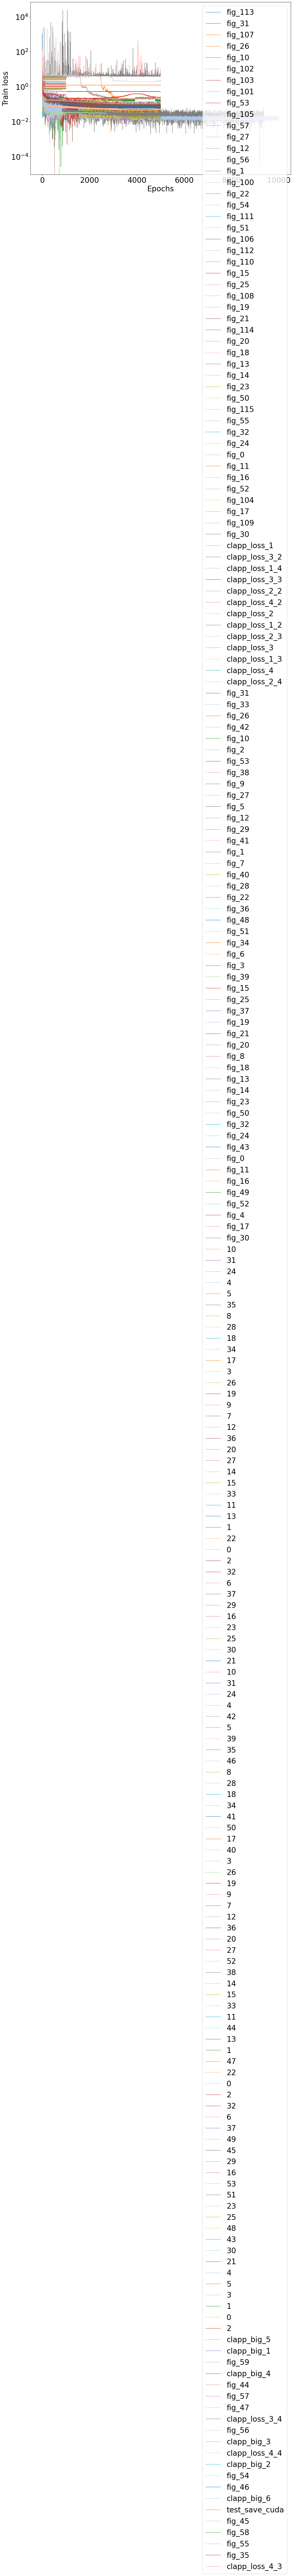

In [9]:
col_fun = setup_colors(enc_of_interest)
plot_all_train_losses(enc_of_interest, col_fun=col_fun, smooth=1)

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: xlabel='Epochs', ylabel='Train loss'>)

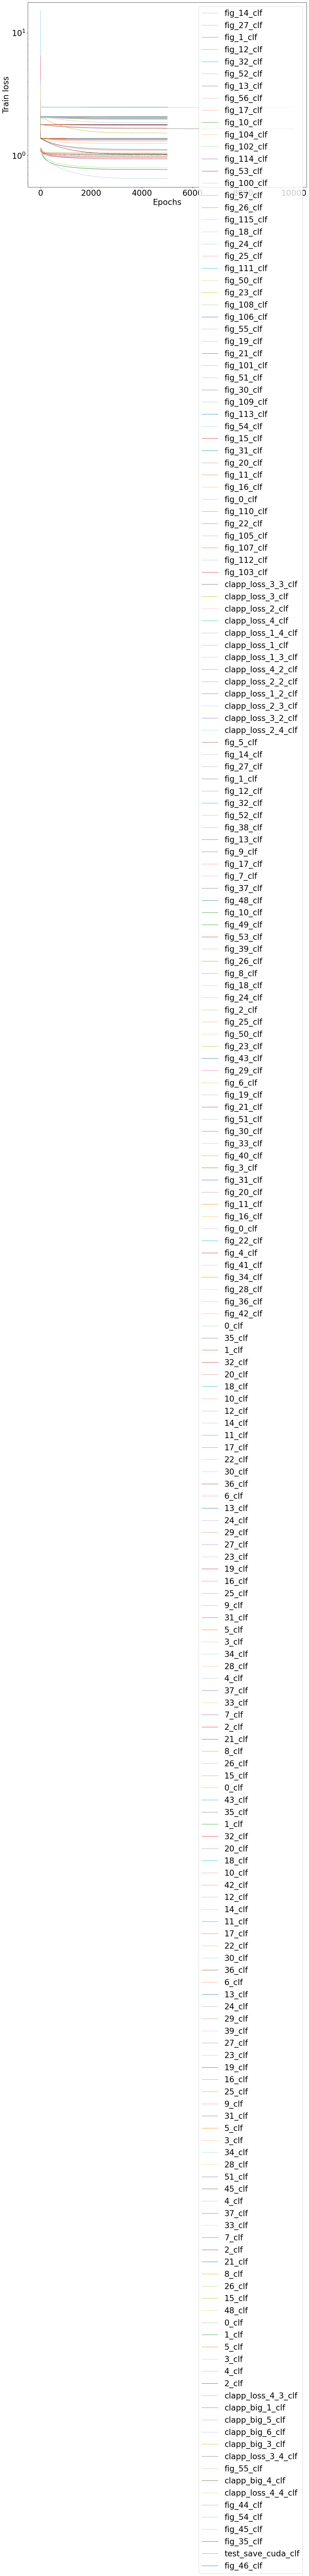

In [10]:
plot_all_train_losses(ev_of_interest, col_fun=col_fun)

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: xlabel='Epochs', ylabel='Test error (%)'>)

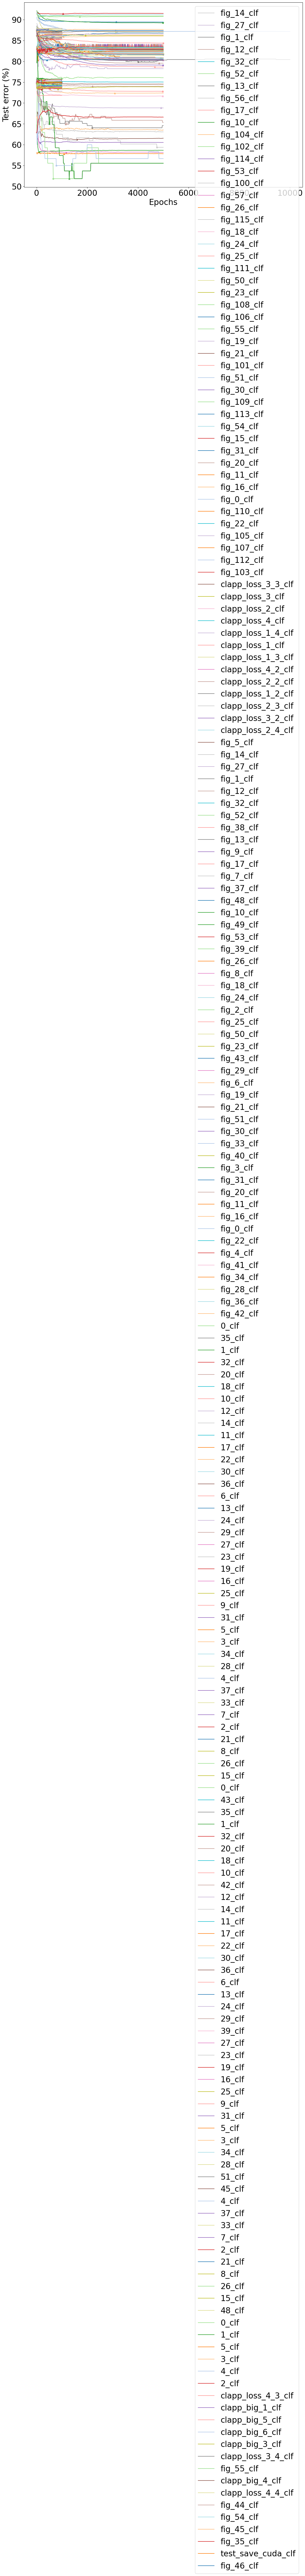

In [11]:
plot_all_test_errors(ev_of_interest, col_fun=col_fun)

## Analyze what are better hyperparameters

In [12]:
encoder_runs[["m", "num_layers", "optim", "lr","scheduler", "momentum", "weight_decay", "width", "ptr", "first_under_4", "zero_loss_threshold", "final_loss"]].sort_values("final_loss")

m  num_layers optim     lr        scheduler  momentum  weight_decay  \
39   12           2   sgd  0.010  cosineannealing       0.9        0.0005   
48    4           3   sgd  0.010  cosineannealing       0.9        0.0005   
88    8           2   sgd  0.010  cosineannealing       0.9        0.0005   
56    4           3   sgd  0.010  cosineannealing       0.9        0.0005   
14    6           2   sgd  0.010  cosineannealing       0.9        0.0005   
..   ..         ...   ...    ...              ...       ...           ...   
129   4           4   sgd  0.020      exponential       0.9        0.0000   
26    6           4  adam  0.005             none       0.9        0.0005   
31    6           4  adam  0.020             none       0.9        0.0005   
222   2           2   sgd  0.010  cosineannealing       0.9        0.0005   
24    6           4  adam  0.010             none       0.9        0.0005   

                 width    ptr  first_under_4  zero_loss_threshold  final_loss  
39                 288   3456       0.037037                0.003    0.016154  
48                 128   1024       2.250000                0.010    0.021919  
88                 128    512       0.250000                0.030    0.022629  
56                  64   1024       2.125000                0.010    0.023165  
14                  72    432       0.250000                0.003    0.023555  
..                 ...    ...            ...                  ...         ...  
129  [32, 32, 64, 128]   2048    5555.000000                0.005    4.000000  
26                  72  15552    5555.000000                0.003    4.004132  
31                  72  15552    5555.000000                0.003    4.056897  
222                 64     19       1.000000                0.050    4.527820  
24                  72  15552    5555.000000                0.003    4.628716  

[228 rows x 12 columns]

In [13]:
stuck = encoder_runs[encoder_runs.first_under_4 > 5000]
stuck[["m", "num_layers", "optim", "lr","scheduler", "momentum", "weight_decay", "width", "ptr"]]#.apply(lambda x: x.unique(), axis=0)

m  num_layers optim     lr        scheduler  momentum  weight_decay  \
10    6           4   sgd  0.010  cosineannealing       0.9        0.0005   
13    6           4   sgd  0.010  cosineannealing       0.9        0.0000   
24    6           4  adam  0.010             none       0.9        0.0005   
26    6           4  adam  0.005             none       0.9        0.0005   
28    6           4   sgd  0.010      exponential       0.9        0.0000   
31    6           4  adam  0.020             none       0.9        0.0005   
109   4           4   sgd  0.020      exponential       0.9        0.0000   
117   4           4   sgd  0.020      exponential       0.9        0.0000   
129   4           4   sgd  0.020      exponential       0.9        0.0000   
131   8           3   sgd  0.050      exponential       0.9        0.0000   
132   4           4   sgd  0.005      exponential       0.9        0.0000   
133   4           4   sgd  0.050      exponential       0.9        0.0000   
134   4           4   sgd  0.010      exponential       0.9        0.0000   
136   4           4   sgd  0.010      exponential       0.9        0.0000   
137   4           4   sgd  0.010      exponential       0.9        0.0000   
139   4           4   sgd  0.020      exponential       0.9        0.0000   
144   8           3   sgd  0.050      exponential       0.9        0.0000   
146   4           4   sgd  0.050      exponential       0.9        0.0000   
150   4           4   sgd  0.050      exponential       0.9        0.0000   
152   4           4   sgd  0.050      exponential       0.9        0.0000   
156   4           4   sgd  0.002      exponential       0.9        0.0000   
164   4           4   sgd  0.050      exponential       0.9        0.0000   
168   4           4   sgd  0.002      exponential       0.9        0.0000   
169   4           4   sgd  0.050      exponential       0.9        0.0000   
171   4           4   sgd  0.010      exponential       0.9        0.0000   
181   4           4   sgd  0.010      exponential       0.9        0.0000   
183   4           4   sgd  0.050      exponential       0.9        0.0000   
184   4           4   sgd  0.010      exponential       0.9        0.0000   
185   4           4   sgd  0.010      exponential       0.9        0.0000   
187   4           4   sgd  0.002      exponential       0.9        0.0000   
195   4           4   sgd  0.050      exponential       0.9        0.0000   
200   4           4   sgd  0.050      exponential       0.9        0.0000   
201   8           4   sgd  0.010      exponential       0.9        0.0000   
202   8           4   sgd  0.010      exponential       0.9        0.0000   
209  12           4   sgd  0.010  cosineannealing       0.9        0.0005   
212  12           4   sgd  0.010  cosineannealing       0.9        0.0005   
215  12           4   sgd  0.010  cosineannealing       0.9        0.0005   
224  12           4   sgd  0.010  cosineannealing       0.9        0.0005   

                   width     ptr  
10                   360   15552  
13                   360   15552  
24                    72   15552  
26                    72   15552  
28                   360   15552  
31                    72   15552  
109  [64, 128, 192, 224]    2048  
117     [64, 64, 64, 64]    2048  
129    [32, 32, 64, 128]    2048  
131      [128, 128, 256]    8192  
132  [64, 128, 192, 224]    2048  
133  [64, 128, 192, 224]    2048  
134  [64, 128, 192, 224]    2048  
136   [32, 64, 128, 128]    2048  
137    [32, 32, 64, 128]    2048  
139   [32, 64, 128, 128]    2048  
144      [128, 256, 512]    8192  
146     [64, 64, 64, 64]    2048  
150                    2    4096  
152                    2    4096  
156                    2    4096  
164                    2    4096  
168                    2    4096  
169                    5    4096  
171                   10    4096  
181                    2    4096  
183                   10    4096  
184                   

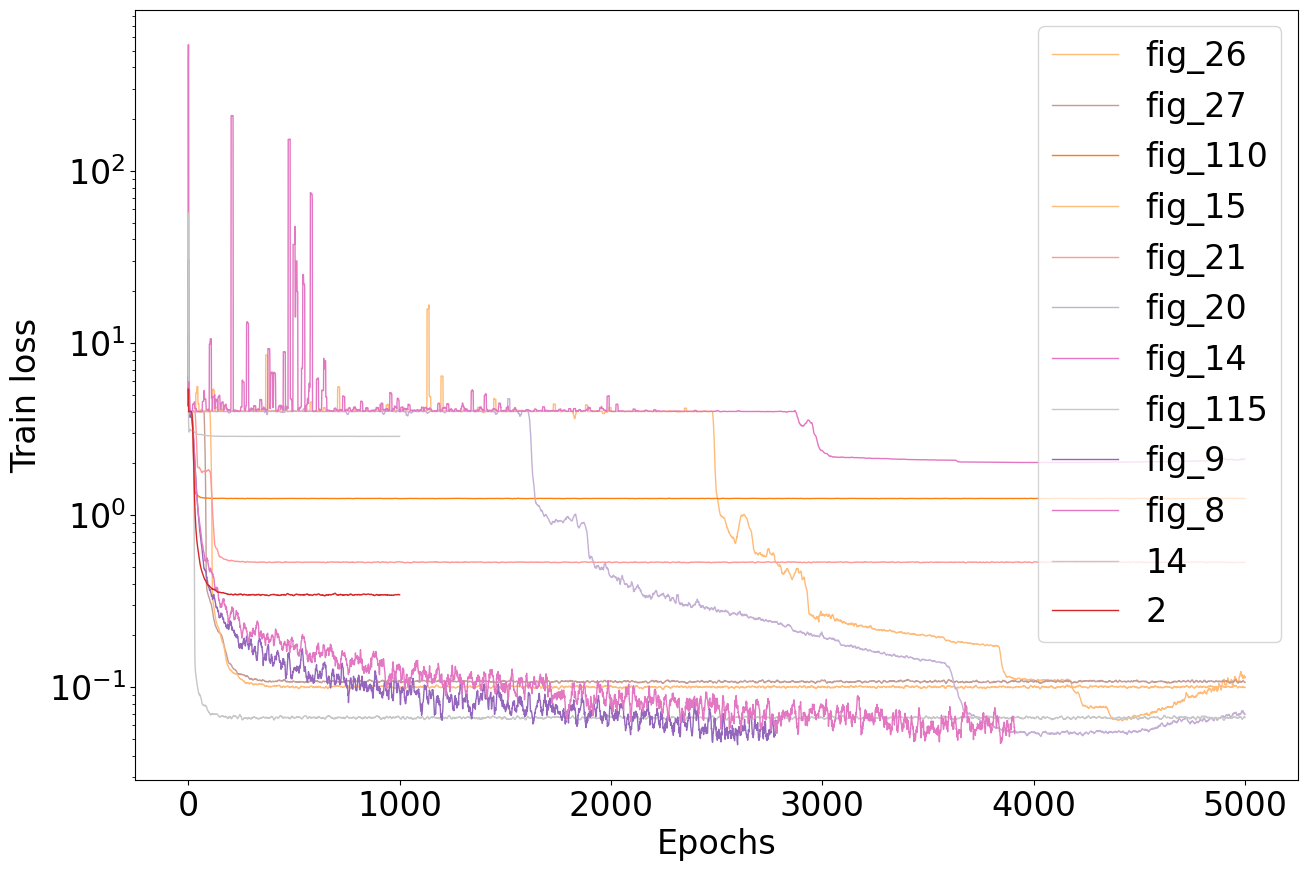

In [14]:
lates = encoder_runs[(encoder_runs.first_under_4 >= 20) & (encoder_runs.first_under_4 < 5000)]
f, a = plot_all_train_losses(lates, col_fun=setup_colors(lates), smooth=10)
# a.set_xlim(-1, 200)

In [15]:
lates[["m", "num_layers", "optim", "lr","scheduler", "momentum", "weight_decay", "width", "ptr"]]

m  num_layers optim     lr        scheduler  momentum  weight_decay  \
3    6           4  adam  0.010  cosineannealing       0.9        0.0005   
11   6           4  adam  0.010      exponential       0.9        0.0005   
22   6           4   sgd  0.010      exponential       0.9        0.0000   
23   6           4  adam  0.020      exponential       0.9        0.0005   
27   6           4  adam  0.005      exponential       0.9        0.0005   
29   6           4  adam  0.005  cosineannealing       0.9        0.0005   
32   6           4  adam  0.020  cosineannealing       0.9        0.0005   
35   6           4   sgd  0.004      exponential       0.9        0.0000   
68   3           4   sgd  0.010  cosineannealing       0.9        0.0005   
92   3           4   sgd  0.010  cosineannealing       0.9        0.0005   
175  4           4   sgd  0.050      exponential       0.9        0.0000   
206  4           4   sgd  0.010      exponential       0.9        0.0000   

    width    ptr  
3      72  15552  
11     72  15552  
22    144  15552  
23     72  15552  
27     72  15552  
29     72  15552  
32     72  15552  
35    360  15552  
68     18    243  
92     18    194  
175     5   4096  
206    32   2048

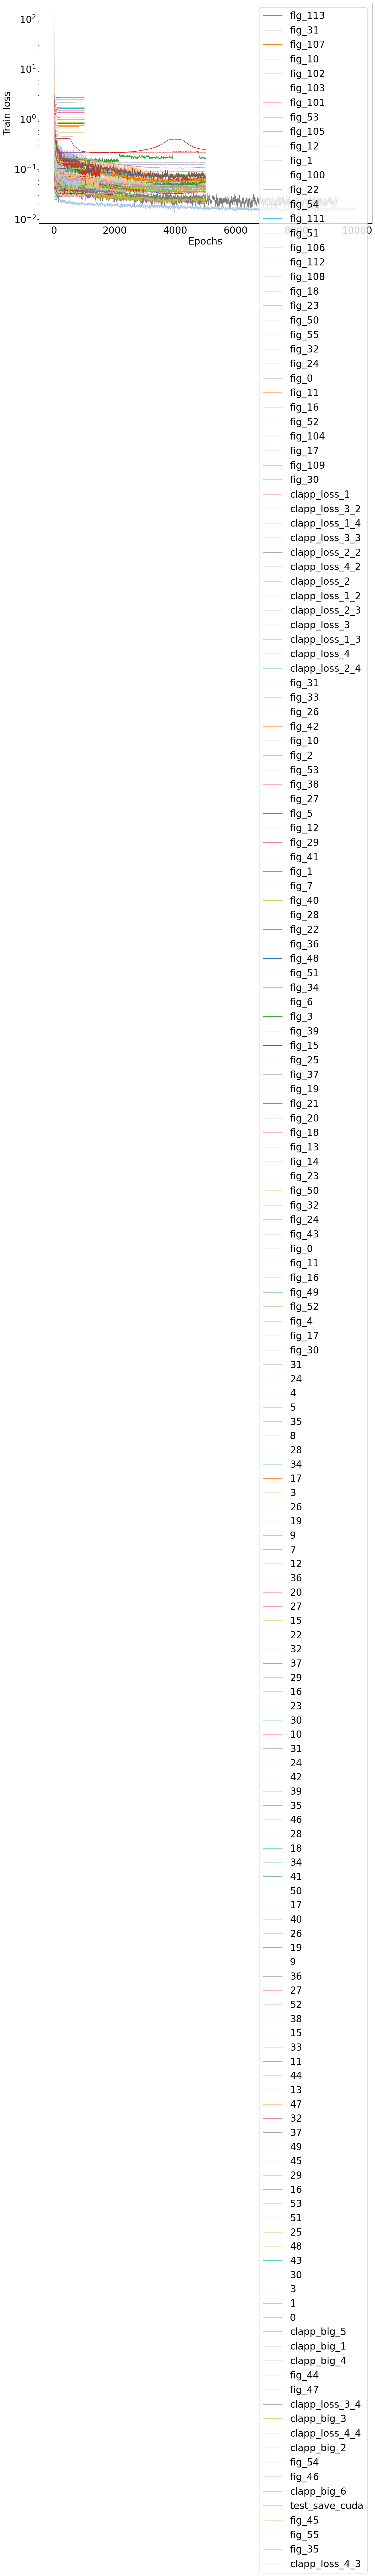

In [16]:
earlies = encoder_runs[encoder_runs.first_under_4 < 20]
f, a = plot_all_train_losses(earlies, col_fun=setup_colors(earlies), smooth=10)
# a.set_xlim(-1, 200)

In [17]:
earlies[["m", "num_layers", "optim", "lr","scheduler", "momentum", "weight_decay", "width", "ptr"]]

m  num_layers optim      lr        scheduler  momentum  weight_decay  \
0     6           4   sgd  0.0040      exponential       0.0        0.0000   
1     6           4  adam  0.0005  cosineannealing       0.9        0.0005   
2     6           4   sgd  0.0040      exponential       0.9        0.0000   
4     6           4   sgd  0.0200             none       0.9        0.0005   
5     6           4   sgd  0.0100      exponential       0.9        0.0000   
..   ..         ...   ...     ...              ...       ...           ...   
222   2           2   sgd  0.0100  cosineannealing       0.9        0.0005   
223   8           4   sgd  0.0100  cosineannealing       0.9        0.0005   
225  12           3   sgd  0.0100  cosineannealing       0.9        0.0005   
226   6           4   sgd  0.0100  cosineannealing       0.9        0.0005   
227   4           3   sgd  0.0100  cosineannealing       0.9        0.0005   

    width    ptr  
0     360  15552  
1      72  15552  
2      72  15552  
4      72  15552  
5      36  15552  
..    ...    ...  
222    64     19  
223   128  32768  
225   288  82944  
226    72  31104  
227   320   1024  

[178 rows x 9 columns]

In [18]:
earlies[earlies.optim=="sgd"].lr.unique()

array([0.004, 0.02 , 0.01 , 0.005, 0.002, 0.05 ])

In [19]:
encoder_runs[encoder_runs.optim=="sgd"].lr.unique()

array([0.004, 0.02 , 0.01 , 0.005, 0.002, 0.05 ])

In [20]:
def plot_single_param_effect(param, df, other_params=None, scale=None, crit="first_under_4"):
    if df[param].nunique() < 2:
        print("No values for ", param)
        return
    print(param)
    fig, ax = plt.subplots(figsize=(10,8))
    try:
        ax.scatter(df[param], df[crit], color="gray")
        done = None
    except:
        done = []
        vals = []
        for x in df[param]:
            if x not in done:
                done.append(x)
            vals.append(done.index(x))
        ax.scatter(vals, df[crit], color="gray")
        ax.set_xticks(list(range(len(done))))
        ax.set_xticklabels(done)
        print(done, vals)
    ax.set_xlabel(param)
    ax.set_ylabel(crit)

    if other_params is None:
        return
    # Now, try to draw a link between those that have only that param different
    if param in other_params:
        other_params = [x for x in other_params if x !=param]
    dfp = df[other_params]
    # could be optimized:
    for i, row1 in dfp.iterrows():
        for j, row2 in dfp.iterrows():
            if i<j and row1.equals(row2):
                vals = [df.loc[i][param], df.loc[j][param]]
                if done is not None:
                    vals = [done.index(x) for x in vals]
                if scale=='log':
                    vals = [x if x != 0 else 3.5e-4 for x in vals ]
                ax.plot(vals, [df.loc[i][crit], df.loc[j][crit]], color='k', alpha=0.1)
    # ax.set_xscale('log')


def plot_each_param_effect(params, controls, df, **kwargs):
    for param in params:
        plot_single_param_effect(param, df, params+controls, **kwargs)

In [21]:
encoder_runs["relative_width"] = encoder_runs.apply(lambda x: x.width / (x.num_features**2), axis=1)

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [ ]:
plot_each_param_effect(["optim", "lr","scheduler", "momentum", "weight_decay", #"width",
 "relative_width", "ptr"], ["m", "num_layers"], encoder_runs, scale=None)

eval_runs.epoch_loaded.unique()

## Find which results are good

In [ ]:
good_evals = eval_runs[(eval_runs.best_acc >70) & ~(eval_runs["name"].apply(lambda x: "orig" in x))]
good_encs = encoder_runs[encoder_runs["name"].isin(good_evals.encoder_run.unique())]

In [ ]:
good_evals = eval_runs[eval_runs["name"].apply(lambda x: "clapp_big_" in x)]
good_encs = encoder_runs[encoder_runs["name"].isin(good_evals.encoder_run.unique())]

In [ ]:
def col_fun_big_clfe(row):
    cols = [f"C{i}" for i in range(10)]
    nb = eval(row["name"].split("_clf")[0][10:])
    c = cols[nb]
    if "clfe" in row["name"]:
        ls = "--"
    else:
        ls = "-"
    alphas = {2: 0.2, 4: 0.5, 6: 0.7, 8: 0.8, 12: 1}
    a = alphas[row.m]
    return c, a, ls

In [ ]:
col_fun = col_fun_big_clfe# setup_colors(good_encs)
plot_all_train_losses(good_encs, col_fun=col_fun, smooth=1)

In [ ]:
plot_all_train_losses(good_evals, col_fun=col_fun)

In [ ]:
f, a = plot_all_test_errors(good_evals, col_fun=col_fun)
# a.set_ylim(-1, 8)

In [ ]:
good_evals[["encoder_run", "name", "best_acc", "m", "num_layers", "optim", "lr","scheduler", "momentum", "weight_decay", "width", "ptr", "zero_loss_threshold"]].sort_values("encoder_run")

In [ ]:
good_encs[["m", "num_layers", "optim", "lr","scheduler", "momentum", "weight_decay", "width", "ptr", "zero_loss_threshold"]]

In [ ]:
fig_100s = eval_runs[eval_runs.encoder_run.apply(lambda x: ((x.startswith("fig_")) and (len(x.split("_")[1]) ==3)))]
fig_100s[["encoder_run", "name", "best_acc", "m", "num_layers", "optim", "lr","scheduler", "momentum", "weight_decay", "width", "ptr", "zero_loss_threshold"]].sort_values("encoder_run")

In [ ]:
def compare_rows(df):
    columns_to_drop = ["model_path_eval", "no_reload_optim_eval", "epoch_eval", "no_reload_optim", "start_epoch", "update_non_training_modules_eval", "pred_both_gate_lower_eval", "pred_both_gate_same_eval"]
    columns_to_keep = []
    for col in df.columns:
        if col in columns_to_drop:
            continue
        try:
            n = df[col].nunique()
        except TypeError:
            print(f"Column {col} is non hashable.")   # Todo could check by hand
            columns_to_keep.append(col)
        else:
            if n > 1:
                columns_to_keep.append(col)
    smaller_df = df[columns_to_keep]
    return smaller_df

In [ ]:
compare_rows(fig_100s)

In [ ]:
plot_each_param_effect(params=["lr", "ptr", "width", "zero_loss_threshold"],
                       controls=["m", "num_layers", "optim", "scheduler", "momentum",  "weight_decay",],
                       df=eval_runs[eval_runs.encoder_run.apply(lambda x: "orig" not in x)],
                       scale=None,
                       crit="best_acc")

## Finding a good enc

In [ ]:
good_encs = clapp_runs[(clapp_runs.m == 4) & (clapp_runs.num_layers==3) & (clapp_runs.final_loss < 0.1) & (clapp_runs.optim == "sgd")]
good_evals = clapp_evals[clapp_evals.encoder_run.isin(good_encs["name"])]

In [ ]:
good_encs[["name", "k_predictions", "ptr", "lr", "final_loss", "width", "num_features", "correlations"]].sort_values("final_loss")

In [ ]:
good_evals[["name", "best_acc", "k_predictions", "ptr", "lr", "width", "correlations"]].sort_values("best_acc")

In [ ]:
to_be_selected = good_encs[(good_encs.num_features == 8) & (good_encs.correlations) & (good_encs.ptr == 2048)]
to_be_selected[["name", "ptr", "lr", "final_loss", "width", "num_features", "correlations"]].sort_values("final_loss")
to_be_selected_evals = good_evals[good_evals.encoder_run.isin(to_be_selected["name"])]

In [ ]:
compare_rows(to_be_selected)

In [ ]:
cf = setup_colors(to_be_selected)
plot_all_train_losses(to_be_selected, col_fun=cf)

In [ ]:
plot_all_train_losses(to_be_selected_evals, col_fun=cf)
plot_all_test_errors(to_be_selected_evals, col_fun=cf)

## Finding a good dec

In [31]:
decs = clapp_evals[clapp_evals.encoder_run.apply(lambda x:"clapp_loss_3_4" in x)]

def dec_lr_cols(row):
    if row.scheduler == "exponential":
        ls = '--'
    else:
        ls = '-'
    if row.lr == 0.1:
        c = "C3"
    elif row.lr == 0.03:
        c = "C1"
    elif row.lr == 0.01:
        c = "C2"
    else:
        c = "C0"
    return c, 1, ls

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: xlabel='Epochs', ylabel='Train loss'>)

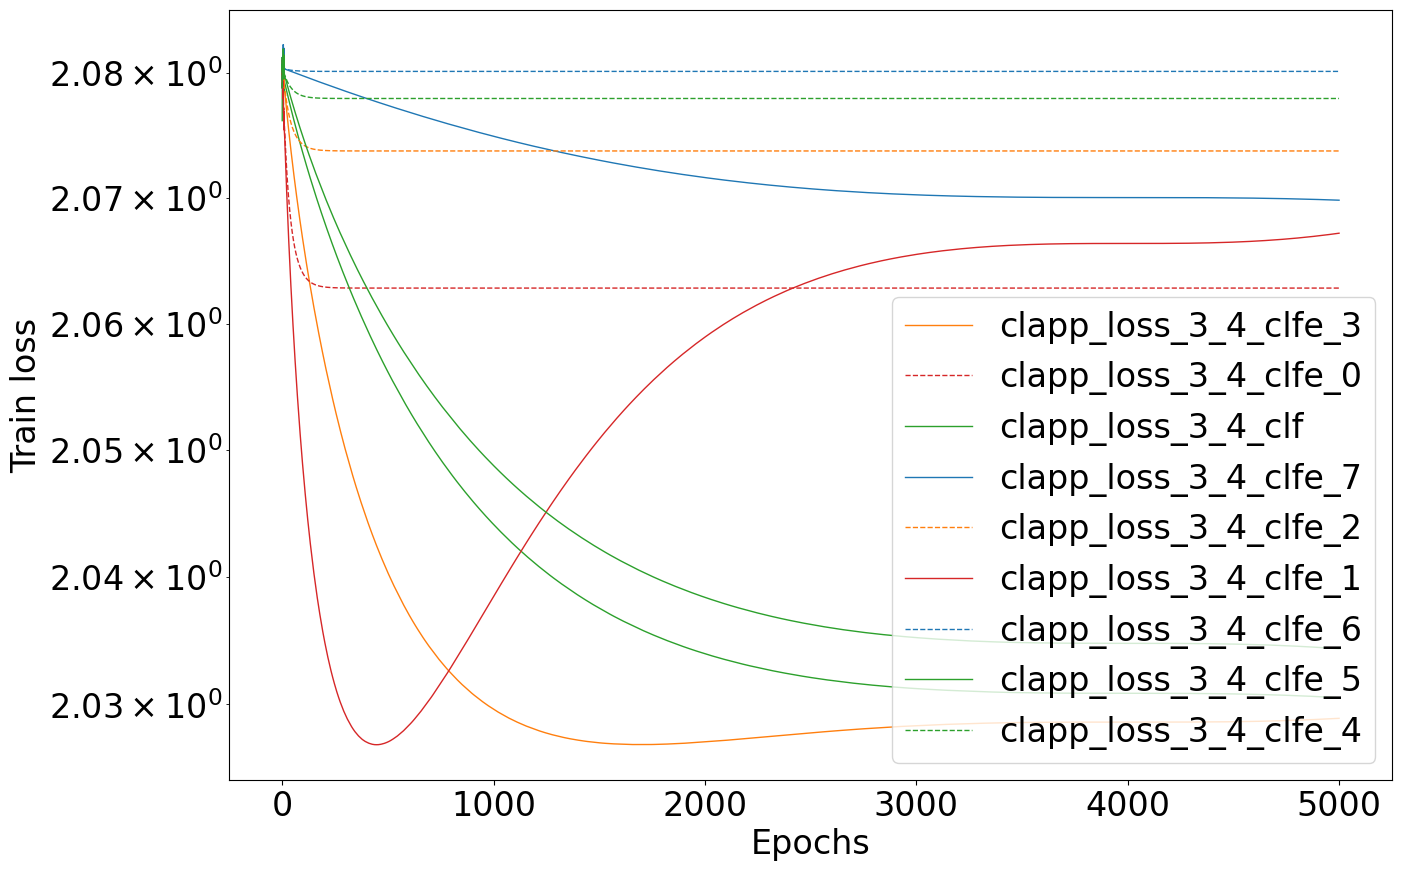

In [32]:
plot_all_train_losses(decs, col_fun=dec_lr_cols, smooth=3)

In [33]:
len(decs)

9